In [1]:
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

In [2]:
@nb.njit(nb.float64(nb.float64, nb.float64, nb.float64))
def harmonic_density_matrix(x1, x2, beta):
    return 1/np.sqrt(2*np.pi*np.sinh(beta)) * np.exp(-0.25*(x1+x2)*(x1+x2)*np.tanh(0.5*beta)-0.25*(x1-x2)*(x1-x2)/np.tanh(0.5*beta))

In [3]:
beta = 4.0
nbpts = 10000
xstart, xend = 0.0, 1.0
nsteps = 100000

In [4]:
@nb.njit(nb.float64[:](nb.float64, nb.int32, nb.float64, nb.float64))
def levy_harmonic_path(beta, nbpts, xstart, xend):
    dtau = beta / nbpts
    x = np.zeros(nbpts+1)
    x[0] = xstart
    x[nbpts] = xend

    for k in range(1, nbpts):
        dtau_prime = (nbpts - k) * dtau
        Ups1 = 1 / np.tanh(dtau) + 1 / np.tanh(dtau_prime)
        Ups2 = x[k-1] / np.sinh(dtau) + x[nbpts] / np.sinh(dtau_prime)
        meanxk = Ups2 / Ups1
        sigma = np.reciprocal(np.sqrt(Ups1))
        x[k] = np.random.normal(meanxk, sigma)
        
    return x

In [5]:
x = np.zeros((nsteps, nbpts+1))
for step in range(nsteps):
    x[step, :] = levy_harmonic_path(beta, nbpts, xstart, xend)

(array([4.3000e+01, 5.8400e+02, 4.1070e+03, 1.5726e+04, 3.0467e+04,
        2.9823e+04, 1.4924e+04, 3.8210e+03, 4.8000e+02, 2.5000e+01]),
 array([-2.7956819 , -2.20690239, -1.61812288, -1.02934337, -0.44056386,
         0.14821565,  0.73699517,  1.32577468,  1.91455419,  2.5033337 ,
         3.09211321]),
 <BarContainer object of 10 artists>)

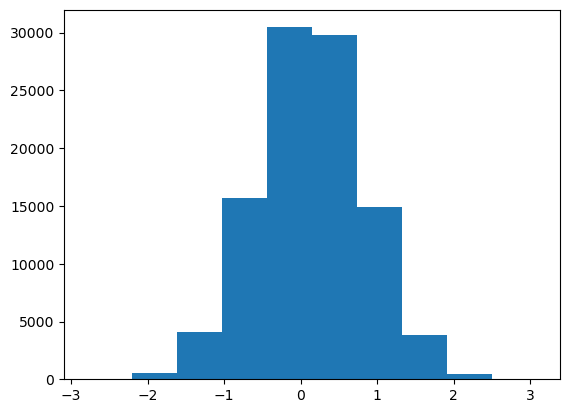

In [6]:
plt.hist(x[:, nbpts // 2])

In [7]:
x = np.linspace(-3, 3, 1000)
y = np.vectorize(lambda x1: harmonic_density_matrix(x1, x1, beta))(x)

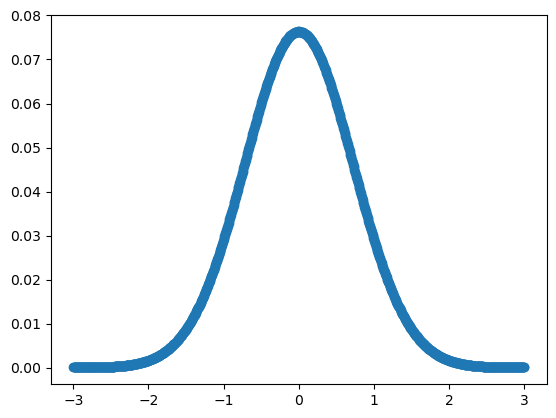

In [8]:
plt.scatter(x, y)